## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

## Query for the data and create a numpy array

In [8]:
import pg8000 as pg
import numpy as np

In [4]:
host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
database='training'
port=5432
user='dot_student'
password='qgis'
table = 'winequality'

In [44]:
conn=pg.connect(host=host, user=user, database=database, port=port, password=password)#, table=table)
cursor=conn.cursor()

In [53]:
conn.rollback()

In [54]:
#cursor.execute("select column_name from from information_schema.columns where table_name='winequality'")
cursor.execute("select * from winequality")
wines=np.array(cursor.fetchall())

In [56]:
len(wines[0])

12

## Split the data into features (x) and target (y, the last column in the table)

### Remember you can cast the results into an numpy array and then slice out what you want

In [62]:
x=wines[:,:11]
y=wines[:,11]

## Create a decision tree with the data

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt=DecisionTreeClassifier()
dt=dt.fit(x,y)

## Run 10-fold cross validation on the model

In [60]:
from sklearn.cross_validation import cross_val_score

In [64]:
scores=cross_val_score(dt,x,y,cv=10)

In [65]:
np.mean(scores)

0.9793741726990316

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)

In [34]:
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

In [83]:
[name.decode("utf-8") for name in field_names[:-1]]

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

(0, 1)

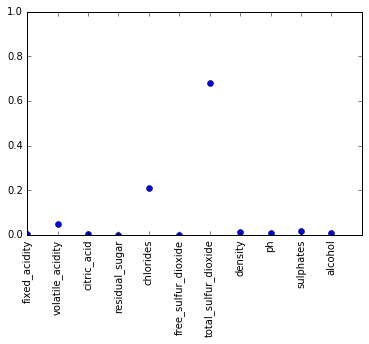

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dt.feature_importances_, 'o')
plt.xticks(range(wines.data.shape[1]), [name.decode("utf-8") for name in field_names[:-1]], rotation=90)
plt.ylim(0,1)